In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

In [2]:
%matplotlib inline

In [3]:
plt.rcParams["figure.figsize"] = [13,5]

## Data

- [Kaggle House Prices for Advanced Regression Techniques](https://www.kaggle.com/c/house-prices-advanced-regression-techniques) dataset
- Goal is to predict sales prices

In [4]:
# Load Data
input_dir = "./data/"

# Load my data
train_file = os.path.join(input_dir, "train.csv")
test_file = os.path.join(input_dir, "test.csv")

train = pd.read_csv(train_file)
test = pd.read_csv(test_file)

X = train.iloc[:,:-1]
y = train.iloc[:,-1]

In [5]:
X.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [6]:
y.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

## Map features

Mapping categorical variables to continuous value (Day24)

In [7]:
# Map categorical variables with one-hot encoding
X_transformed = pd.get_dummies(X)
print(X_transformed.shape)

# Drop NAs (because regression tree can't handle NAs)
X_transformed.dropna(axis=1, how='any', inplace=True)
print(X_transformed.shape)

(1460, 289)
(1460, 286)


In [8]:
# Split to train and test set
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2)

print("feature:", X_train.shape[1])
print("num train samples:", X_train.shape[0])
print("num valid samples:", X_test.shape[0])

feature: 286
num train samples: 1168
num valid samples: 292


## Regression tree

In [9]:
from sklearn import tree

In [10]:
clf = tree.DecisionTreeRegressor()
clf = clf.fit(X_train, y_train)

Prediction accuracy for exact answer:

In [16]:
import sklearn.metrics
sklearn.metrics.accuracy_score(y_pred=clf.predict(X_test), y_true=y_test)

0.013698630136986301

Prediction accuracy allowing some margin of error:

In [14]:
def evaluation(margin = 5000):
    def _eval(m):
        y_hat = clf.predict(X_test)
        answer_within_range = (y_test+m > y_hat) & (y_hat > y_test-m)
        return(sum(answer_within_range) / len(answer_within_range))
    
    if type(margin) in [list, range]:
        return([_eval(m) for m in margin])
    else:
        return(_eval(m))

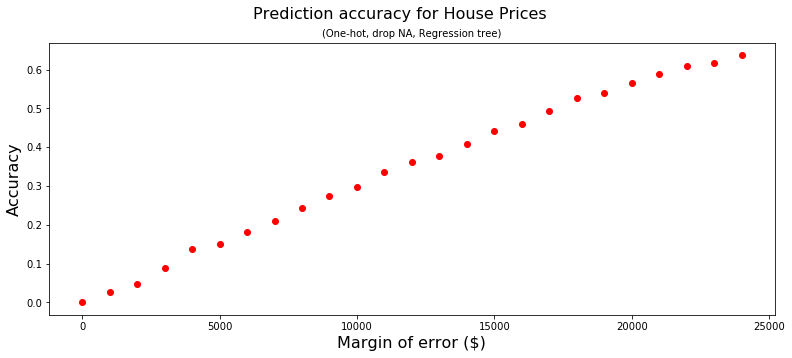

In [15]:
margins = range(0, 25000, 1000)

plt.plot(margins, evaluation(margins), 'ro')
plt.ylabel('Accuracy', fontsize=16)
plt.xlabel('Margin of error ($)', fontsize=16)
plt.suptitle('Prediction accuracy for House Prices', fontsize=16)
plt.title('(One-hot, drop NA, Regression tree)', fontsize=10)